<a href="https://colab.research.google.com/github/thiyagi9/PythonPractises/blob/main/Suzlon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 #library imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_columns', 140)
pd.set_option('precision', 3)

In [80]:
# Uploading "Working hours" from the working machine. This can be replaced by having the file in GDrive itself
from google.colab import files
f1 = files.upload()

Saving 06-06-2019-TO-04-06-2021SUZLONALLN.csv to 06-06-2019-TO-04-06-2021SUZLONALLN.csv


In [121]:
df=pd.read_csv('06-06-2019-TO-04-06-2021SUZLONALLN.csv',parse_dates=True, error_bad_lines=False)
df['Perc_Change']=((df['Close Price']-df['Prev Close'])/df['Prev Close'])*100
df['returns']=df['Close Price'].pct_change()

In [122]:
df['Date']=pd.to_datetime(df['Date'])

In [123]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Perc_Change,returns
count,496.000,496.000,496.000,496.000,496.000,496.000,496.000,4.960e+02,4.960e+02,496.000,496.000,495.000
mean,3.853,3.880,3.965,3.754,3.868,3.856,3.860,2.052e+07,9.034e+07,17753.544,0.160,0.002
std,1.366,1.376,1.404,1.339,1.373,1.373,1.372,2.550e+07,1.485e+08,18199.892,4.516,0.045
min,1.750,1.700,1.800,1.700,1.750,1.750,1.730,7.832e+05,2.820e+06,473.000,-12.500,-0.125
25%,2.650,2.700,2.750,2.550,2.650,2.650,2.658,7.783e+06,2.278e+07,6736.250,-2.778,-0.028
50%,3.600,3.650,3.700,3.500,3.650,3.600,3.625,1.236e+07,4.406e+07,12715.000,0.000,0.000
75%,4.850,4.862,5.000,4.700,4.862,4.850,4.845,2.275e+07,9.820e+07,22032.000,3.404,0.034
max,8.050,8.450,8.450,8.050,8.050,8.050,8.050,2.044e+08,1.502e+09,148508.000,22.388,0.224


In [ ]:
df.head()

In [125]:
df_max1 = df.sort_values('High Price', ascending=False).head(1)

df_maxQty=df.sort_values('Total Traded Quantity',ascending=False).head(10)

In [ ]:
df_maxQty

In [ ]:
df_perc=df[df['Date'].isin(['08-Jan-2021','11-Jan-2021'])]

df_perc


In [ ]:
df[df['Perc_Change']>0]

In [129]:
df_perc['Perc_Change']=((df_perc['Close Price']-df_perc['Prev Close'])/df_perc['Prev Close'])*100

#(df['Close Price']/df['Prev Close'])*100

df_perc['Perc_Change']
#df_perc['Close Price']-df_perc['Prev Close']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


397   -4.969
398   -4.575
Name: Perc_Change, dtype: float64

In [132]:
df['log_returns']=np.log(1+df['returns'])

X=df[['Close Price','log_returns']]

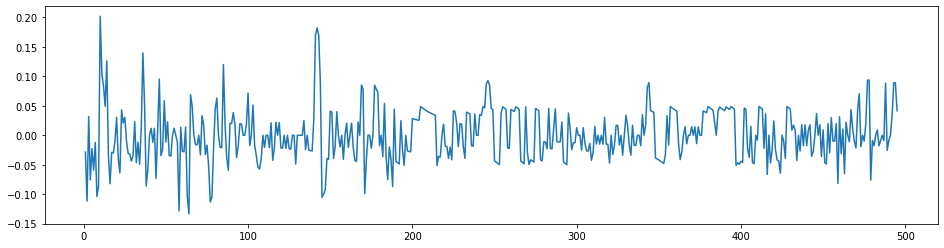

In [140]:
plt.figure(1,figsize=(16,4))
plt.plot(df['log_returns'])

In [133]:
X

,Close Price,log_returns
0,5.35,NaN
1,5.20,-0.028
2,4.65,-0.112
3,4.80,0.032
4,4.45,-0.076
...,...,...
491,5.70,0.000
492,5.90,0.034
493,6.45,0.089
494,7.05,0.089


In [134]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
scaler_new=MinMaxScaler(feature_range=(0,1)).fit(X)

X_scaled=scaler_new.transform(X)

In [141]:
X_scaled[:5]

array([[0.57142857,        nan],
       [0.54761905, 0.31319012],
       [0.46031746, 0.06478756],
       [0.48412698, 0.49255294],
       [0.42857143, 0.17230871]])

In [142]:
y=[x[0] for x in X_scaled]

In [143]:
y[:5]

[0.5714285714285713,
 0.5476190476190476,
 0.46031746031746035,
 0.4841269841269841,
 0.4285714285714286]

In [145]:
split=int(len(X_scaled)*0.8)
split

396

In [154]:
X_train=X_scaled[:split]
X_test=X_scaled[split:len(X_scaled)]
y_train=y[:split]
y_test=y[split:len(y)]


In [160]:
print(X_test.shape,X_train.shape)
print(len(y_train),len(y_test))

(100, 2) (396, 2)
396 100


In [164]:
assert len(X_train)==len(y_train)
assert len(X_test)==len(y_test)


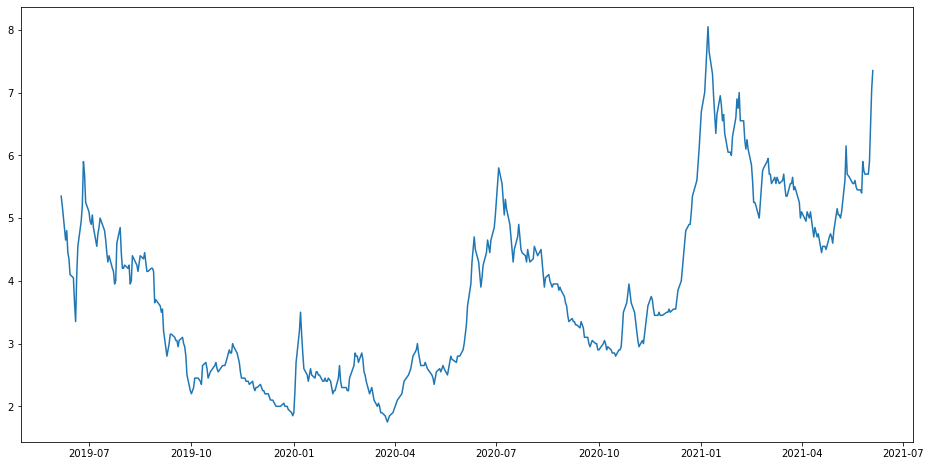

In [100]:

#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'], label='Close Price history')

In [112]:
s=df.shape
size=s[0]*.75
size=int(size)

In [113]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close Price'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values
#size=size.astype(int)
train = dataset[0:size,:]
valid = dataset[size:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

312/312 - 10s - loss: 0.0053


In [114]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.5973485722965811

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


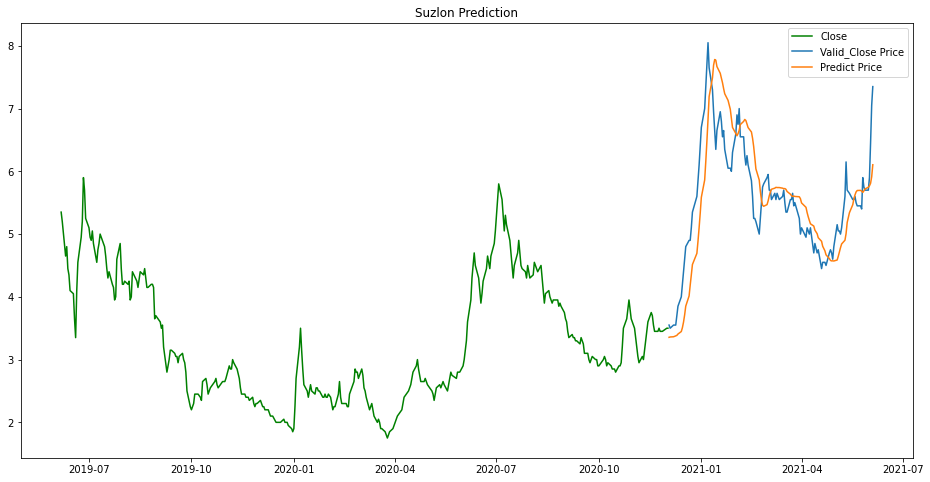

In [117]:
#for plotting
plt.figure(figsize=(16,8))
train = new_data[:size]
valid = new_data[size:]
valid['Predictions'] = closing_price
plt.plot(train['Close'],'g')
plt.plot(valid[['Close','Predictions']]
)
plt.title('Suzlon Prediction')
plt.legend(['Close','Valid_Close Price','Predict Price'])